# Fashion 데이터셋 분류

*컴퓨터공학과 201802105 서보윤

*CNN(Convolution Neural Network)을 활용한 이미지 분류 알고리즘

*CNN으로 모델링. 

*이미지 데이터셋은 keras에서 제공하는 fashion_mnist를 사용. 60000개의 이미지 제공. 10종류.

0 티셔츠/탑
1 바지
2 풀오버(스웨터의 일종)
3 드레스
4 코트
5 샌들
6 셔츠
7 스니커즈
8 가방
9 앵클 부츠


 ### 필요한 패키지 다운로드 

In [2]:
!pip install keras

In [4]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=73f3a495f5d80e32b1a4ab1c6d703ea6e401435477026a9c71515c87330a7c87
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for absl-py: filename=absl_py-0.9.0-py3-none-any.whl size=121935 sha256=e8ee80131ae980d61531f893b1902d264e2cc9163ff1b62f70afc1a6ef80d2f4
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\cc\af\1a\498a24d0730ef484019e007bb9e8cef3ac00311a672c049a3e
Successfully built termcolor absl-py


### Fashion DataSet 불러오기

In [51]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

In [52]:
#shape of data
print("Shape of x_train:\t", x_train.shape)
print("Shape of y_train:\t", y_train.shape)
print("Shape of x_test:\t", x_test.shape)
print("Shape of y_test:\t", y_test.shape)

print(set(y_train))

Shape of x_train:	 (60000, 28, 28)
Shape of y_train:	 (60000,)
Shape of x_test:	 (10000, 28, 28)
Shape of y_test:	 (10000,)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


Text(0.5, 1.0, 'T-shirt/top')

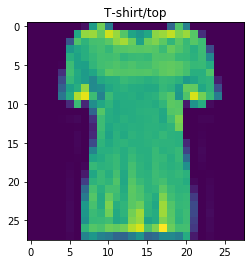

In [53]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#fashion dataset 예시
sample_index = 10
plt.imshow(x_train[sample_index])
plt.title(class_names[y_train[sample_index]])

In [54]:
# 데이터 크기 정규화
x_train = x_train / 255.0
x_test = x_test / 255.0

In [55]:
# reshape: (28,28) -> (28,28,1)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [56]:
# one-hot 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Model 구성

In [57]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten()) # 이미지를 일차원으로 바꿈.
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 27, 27, 64)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2769152   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 2,772,042
Trainable params: 2,772,042
Non-trainable params: 0
_________________________________________________________________


### Train

In [59]:
# Model 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
batch_size = 64
epochs = 10

model.fit(x_train, y_train, batch_size, epochs)

Epoch 1/10
938/938 [==============================] - 39s 41ms/step - loss: 0.4068 - accuracy: 0.8555
Epoch 2/10
938/938 [==============================] - 40s 43ms/step - loss: 0.2769 - accuracy: 0.8989
Epoch 3/10
938/938 [==============================] - 40s 43ms/step - loss: 0.2286 - accuracy: 0.9161
Epoch 4/10
938/938 [==============================] - 41s 43ms/step - loss: 0.1957 - accuracy: 0.92782s - loss: 0.1964 - ac - ETA: 2s - loss: 0.1965 - accu
Epoch 5/10
938/938 [==============================] - 41s 44ms/step - loss: 0.1691 - accuracy: 0.9376
Epoch 6/10
938/938 [==============================] - 41s 44ms/step - loss: 0.1444 - accuracy: 0.9474
Epoch 7/10
938/938 [==============================] - 43s 45ms/step - loss: 0.1218 - accuracy: 0.9561
Epoch 8/10
938/938 [==============================] - 42s 45ms/step - loss: 0.1038 - accuracy: 0.9619
Epoch 9/10
938/938 [==============================] - 43s 46ms/step - loss: 0.0895 - accuracy: 0.9671
Epoch 10/10
938/938 [=======

In [61]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)

# 테스트 정확도
print('\nTest accuracy:', acc)


Test accuracy: 0.9154000282287598


### Predict

In [62]:
pred = model.predict(x_test)
print(pred)

[[2.11879114e-06 5.58929125e-10 1.36245504e-07 ... 5.80056258e-05
  9.03652477e-08 9.99938965e-01]
 [3.21412124e-08 7.36731946e-16 9.99919295e-01 ... 2.38081531e-14
  1.65389908e-14 6.40570233e-15]
 [2.31107281e-14 1.00000000e+00 1.29462443e-15 ... 5.26984959e-24
  5.45853919e-16 9.12022080e-17]
 ...
 [9.00430286e-11 1.22994531e-16 1.05803186e-10 ... 7.39829031e-12
  1.00000000e+00 2.53676373e-15]
 [2.37539751e-13 1.00000000e+00 1.70663573e-13 ... 3.87681045e-19
  1.18749208e-13 2.26638782e-12]
 [2.72385205e-06 3.00331626e-09 1.19639204e-04 ... 1.73059758e-02
  4.80162089e-05 1.09214487e-03]]


In [63]:
for i in range(0, 20):
    test_name = class_names[np.argmax(y_test[i])]
    pred_name = class_names[np.argmax(pred[i])]
    if len(test_name) > 5:
        print(test_name , " \t->\t ", pred_name)
    else:
        print(test_name , " \t\t->\t ", pred_name)

Ankle boot  	->	  Ankle boot
Pullover  	->	  Pullover
Trouser  	->	  Trouser
Trouser  	->	  Trouser
Shirt  		->	  Shirt
Trouser  	->	  Trouser
Coat  		->	  Coat
Shirt  		->	  Shirt
Sandal  	->	  Sandal
Sneaker  	->	  Sneaker
Coat  		->	  Coat
Sandal  	->	  Sandal
Sneaker  	->	  Bag
Dress  		->	  Dress
Coat  		->	  Coat
Trouser  	->	  Trouser
Pullover  	->	  Pullover
Coat  		->	  Coat
Bag  		->	  Bag
T-shirt/top  	->	  T-shirt/top
